In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#for graphs, visuals, etc.
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
# once add
import plotly.express as px
import cufflinks as cf
cf.go_offline()
# for Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
data_read = pd.read_csv('/content/IRIS.csv')
from sklearn.datasets import load_iris
data = load_iris()
# some information from documentation
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# How data Look!
#data initially comes as dictionary with array of lists, split between 'data' and 'target' values
print(data.data[:5])
print(data.feature_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print(data.target)
print(data.target_names)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [6]:
tod = pd.DataFrame(data.data)
tod.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
tod.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
#now the data is in a dataframe where we can easily see what each of the numbers is referring to
tod.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
target = pd.DataFrame(data.target)
target = target.rename(columns = {0: 'target'})
print(target.head())
print('all target column have 3 value: ',target.target.unique())

   target
0       0
1       0
2       0
3       0
4       0
all target column have 3 value:  [0 1 2]


In [9]:
# general statistical overview of the data columns
# this is also a good way to check your data for extreme outliers if the min/max seems extremely far from the mean, you can investigate the data further
tod.describe()
print('see what type of data you have:\n',tod.dtypes)
print('<---------------------------------------------------->')
print('check for missing values:\n',tod.isnull().sum())

see what type of data you have:
 sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
dtype: object
<---------------------------------------------------->
check for missing values:
 sepal length    0
sepal width     0
petal length    0
petal width     0
dtype: int64


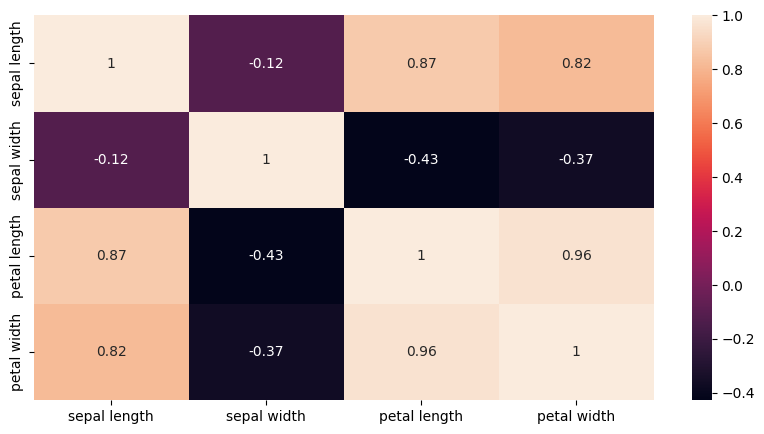

In [10]:
#check correlations by using heatmap
plt.rcParams['figure.figsize'] = [10,5]
sns.heatmap(tod.corr(), annot = True);

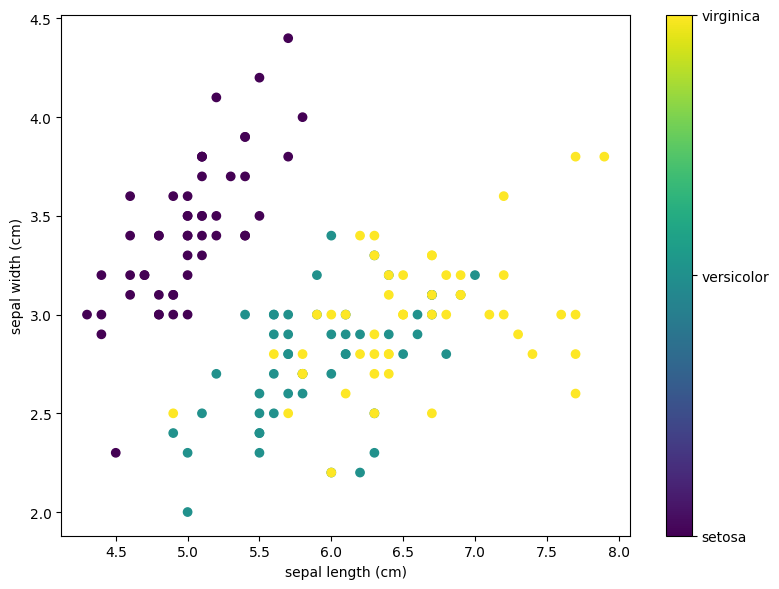

In [11]:
# To start looking at the relationships between features, we can create scatter plots
# to further visualize the way the different classes of flowers relate to sepal and petal data

x_index = 0
y_index = 1

formatter = plt.FuncFormatter(lambda i, *args:data.target_names[int(i)])
plt.figure(figsize=(8,6))
plt.scatter(data.data[:, x_index], data.data[:, y_index], c=data.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(data.feature_names[x_index])
plt.ylabel(data.feature_names[y_index])
plt.tight_layout()
plt.show()

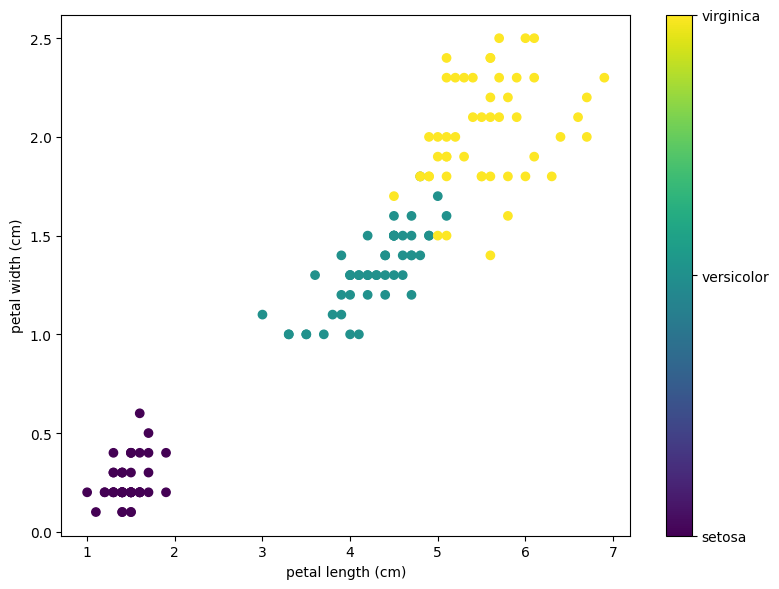

In [12]:
# Now let’s create the same scatter plot to compare the petal data points.
x_index = 2
y_index = 3

formatter = plt.FuncFormatter(lambda i, *args:data.target_names[int(i)])
plt.figure(figsize=(8,6))
plt.scatter(data.data[:, x_index], data.data[:, y_index], c=data.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(data.feature_names[x_index])
plt.ylabel(data.feature_names[y_index])
plt.tight_layout()
plt.show()

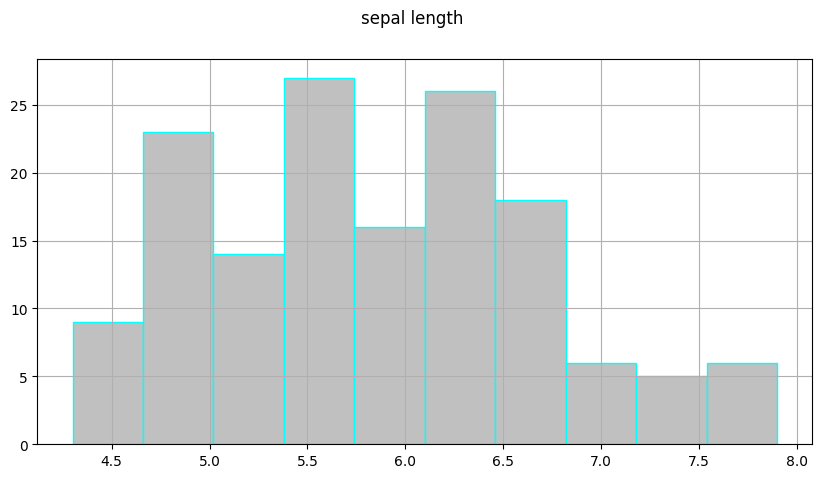

<--------------------------------------------------------------->


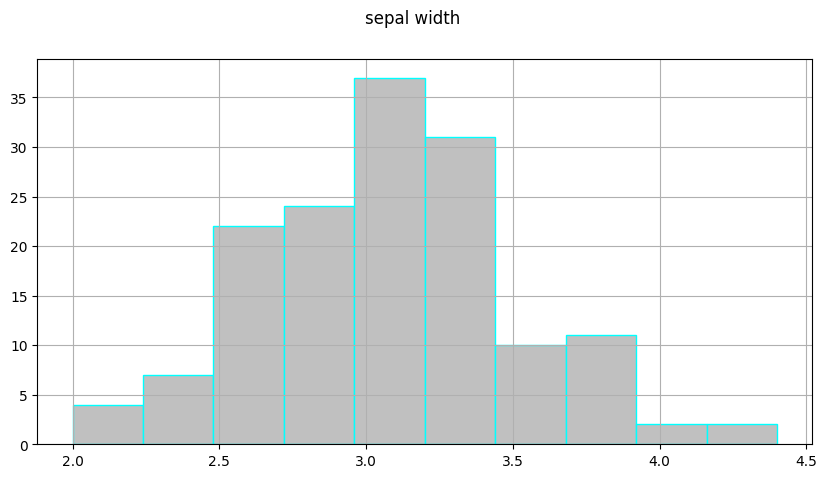

<--------------------------------------------------------------->


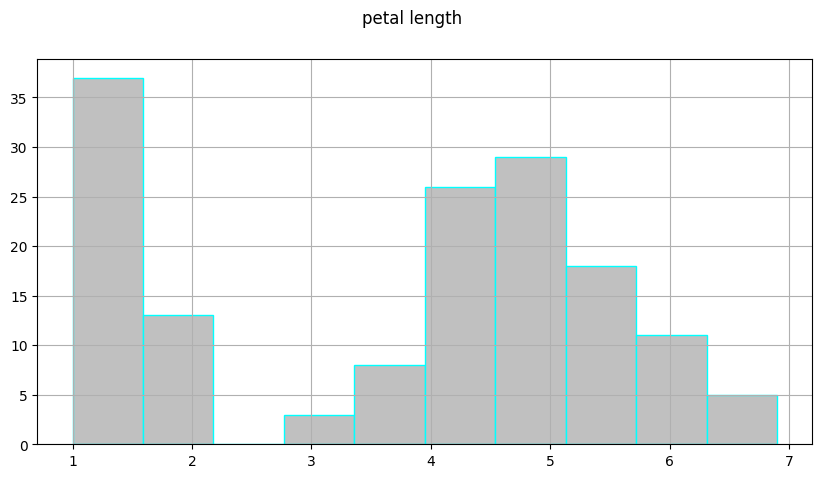

<--------------------------------------------------------------->


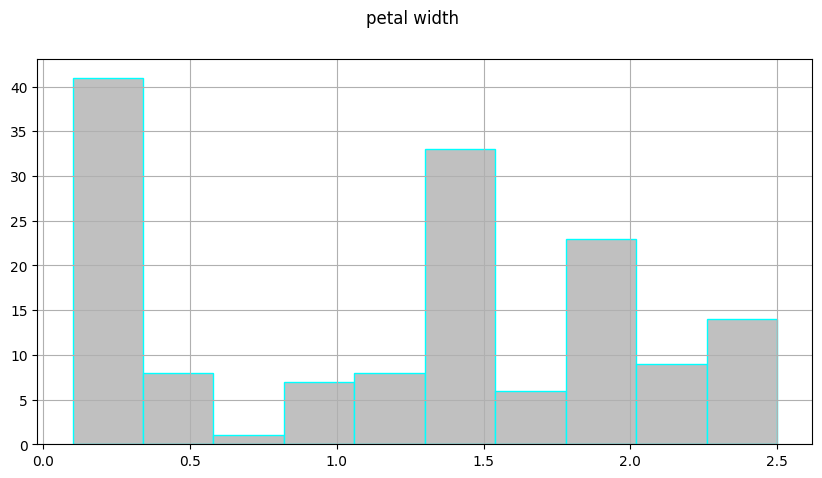

<--------------------------------------------------------------->


In [13]:
for feat in ['sepal length', 'sepal width', 'petal length', 'petal width']:
    tod[feat].hist(ec='aqua',color='#C0C0C0')
    plt.suptitle(feat)
    plt.show()
    print('<--------------------------------------------------------------->')